In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('world_data_full_apply_nulos.csv', index_col=0)
df.head(1)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.23,323.0,32.49,93.0,Kabul,8.672,149.9,2.3,AFN,4.47,2.1,0.7,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.93911,67.709953,Asia


In [10]:
##Calcula las siguientes estadísticas descriptivas para las variables numéricas: Media,Mediana,Desviación estándar,Mínimo,Máximo: 

df_estadistica = df.describe(exclude= "object").T

In [14]:
columnas = [ 'mean', 'std','50%', 'min','max']

df_estadistica_1 = df_estadistica[columnas]
df_estadistica_1

,mean,std,50%,min,max
density,1.345045e+02,1.573068e+02,8.300000e+01,1.265000e+00,8.470000e+02
agricultural_land,3.911755e+01,2.178305e+01,3.960000e+01,6.000000e-01,8.260000e+01
land_area,2.552127e+02,2.583850e+02,1.484600e+02,0.000000e+00,9.640000e+02
armed_forces_size,1.037831e+02,1.671580e+02,2.850000e+01,0.000000e+00,9.360000e+02
birth_rate,2.021497e+01,9.945774e+00,1.795000e+01,5.900000e+00,4.608000e+01
calling_code,3.605464e+02,3.232364e+02,2.555000e+02,1.000000e+00,1.876000e+03
co2-emissions,1.259155e+02,1.817949e+02,3.447700e+01,1.016000e+00,7.279730e+02
cpi,1.441936e+02,5.478400e+01,1.247400e+02,9.903000e+01,5.509300e+02
cpi_change,6.722346e+00,2.445041e+01,2.300000e+00,-4.300000e+00,2.549000e+02
fertility_rate,2.698138e+00,1.282267e+00,2.245000e+00,9.800000e-01,6.910000e+00


In [ ]:
## Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.



In [26]:
pais_mayor_densidad = df.loc[df['density'].idxmax(), ['country', 'density']]
pais_mayor_densidad

country    Palestinian National Authority
density                             847.0
Name: 133, dtype: object

In [27]:
pais_menor_poblacion = df.loc[df['population'].idxmin(), ['country', 'population']]
pais_menor_poblacion

country        Nauru
population    10.084
Name: 120, dtype: object

In [33]:
pd.set_option('display.max_rows', None) # para poder visualizar todas las filas de los DataFrames

In [ ]:
#Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos

media_natalidad = df['birth_rate'].mean()
media_natalidad_pais = df.groupby('country')['birth_rate'].mean().reset_index()
media_natalidad_pais 

<Axes: xlabel='infant_mortality', ylabel='Count'>

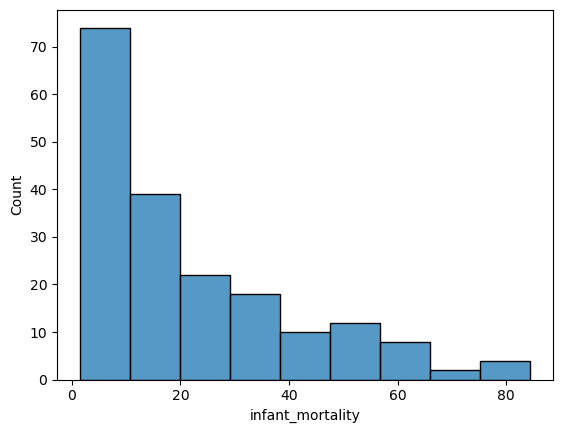

In [36]:
#Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: 
# baja, moderada y alta mortalidad infantil.

sns.histplot(x='infant_mortality', data=df)

<Axes: xlabel='infant_mortality'>

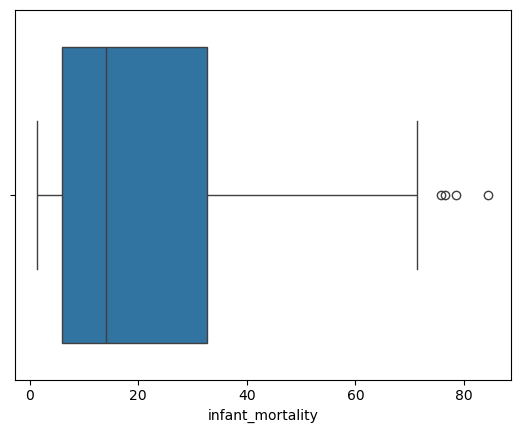

In [41]:
sns.boxplot(x = "infant_mortality", 
            data = df)

In [ ]:
media_mort_inf = df['infant_mortality'].mean() ## esto es la media de todos los paises (mortalidad infantil)
media_mort_inf

21.332804232804236

In [ ]:
mediana_mort_inf = df['infant_mortality'].median() ## esto es la posición media de mortalidad infantil de todos los paises 
mediana_mort_inf

14.0

In [ ]:
df['infant_mortality'].isnull().sum() #chequeamos si hay nulos

6

In [ ]:
Q1 = np.nanpercentile(df["infant_mortality"], 25) #esto es para obtener el 25% de los datos

Q3 = np.nanpercentile(df["infant_mortality"], 75) #esto es para obtener el 75% de los datos

print(Q1, "------------", Q3)

6.0 ------------ 32.7


In [ ]:
IQR = Q3 - Q1 #rango intercuartilico (diferencia entre el valor que esta en el 75% y el que esta en el 25%). No tiene en cuenta valores atipicos. 
IQR


26.700000000000003

In [ ]:
salto = IQR * 1.5 ## formula para identificar los outliers. Esto es el 'valor medio' pero si no hubiera outliers ()
salto

40.050000000000004

In [ ]:
Q3 + salto #calcular a partir de que numero es considerado outlier 

72.75

In [74]:
## dividir en categorias (paises con baja, media y alta mortalidad infantil):

paises_baja_mort = df.groupby('country')['infant_mortality']


In [73]:
paises_baja_mort

In [64]:
paises_baja_mort

[-inf, 6.0]

In [ ]:
# Clasificación de mortalidad infantil (infant_mortality) en categorías
df['infant_mortality_category'] = pd.cut(
    df['infant_mortality'],
    bins=[-np.inf, 20, 50, np.inf],
    labels=['Baja', 'Moderada', 'Alta']
)

# Verificar el número de países en cada categoría
infant_mortality_summary = df['infant_mortality_category'].value_counts()

# Mostrar resultados
print("Resumen de mortalidad infantil por categorías:")
print(infant_mortality_summary)

# Mostrar el DataFrame con la nueva clasificación
df[['country', 'infant_mortality', 'infant_mortality_category']].head()

Resumen de mortalidad infantil por categorías:
infant_mortality_category
Baja        113
Moderada     55
Alta         16
Name: count, dtype: int64


,country,infant_mortality,infant_mortality_category
0,Afghanistan,47.9,Moderada
1,Albania,7.8,Baja
2,Algeria,20.1,Moderada
3,Andorra,2.7,Baja
4,Angola,51.6,Alta
